# Part I - (Ford GoBike System Dataset Exploration)
## by (Bernard Kula)

## Introduction
> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco
Bay area.

## Preliminary Wrangling


In [29]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

import warnings
warnings.simplefilter("ignore")

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [30]:
# load in the dataset into a pandas dataframe, print statistics
GoBike = pd.read_csv('201902-fordgobike-tripdata.csv')
GoBike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [31]:
#Overview of data shape
print(GoBike.shape)

(183412, 16)


In [32]:
#Overview of data types
print(GoBike.dtypes)

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object


In [33]:
# descriptive statistics for numeric variables
print(GoBike.describe())

        duration_sec  start_station_id  start_station_latitude  \
count  183412.000000     183215.000000           183412.000000   
mean      726.078435        138.590427               37.771223   
std      1794.389780        111.778864                0.099581   
min        61.000000          3.000000               37.317298   
25%       325.000000         47.000000               37.770083   
50%       514.000000        104.000000               37.780760   
75%       796.000000        239.000000               37.797280   
max     85444.000000        398.000000               37.880222   

       start_station_longitude  end_station_id  end_station_latitude  \
count            183412.000000   183215.000000         183412.000000   
mean               -122.352664      136.249123             37.771427   
std                   0.117097      111.515131              0.099490   
min                -122.453704        3.000000             37.317298   
25%                -122.412408       44.00000

In [34]:
#Overview information about the DataFrame
print(GoBike.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB
None


In [35]:
# Drop null rows
GoBike.dropna(inplace=True)

In [36]:
# Check to Confirm if rows with null values have been dropped
GoBike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null object
end_time                   174952 non-null object
start_station_id           174952 non-null float64
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null float64
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null int64
user_type                  174952 non-null object
member_birth_year          174952 non-null float64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.7+ MB


### What is the structure of your dataset?

> There are 174,952 data trip records for Ford gobike in the dataset and 16 features.

### What is/are the main feature(s) of interest in your dataset?

> I will focus on duration_sec as the dependent feature.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I am interested in the independent features start_station_name, end_station_name, user_type, member_birth_year and member_gender and how they affect the dependent feature duration_sec.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables. 


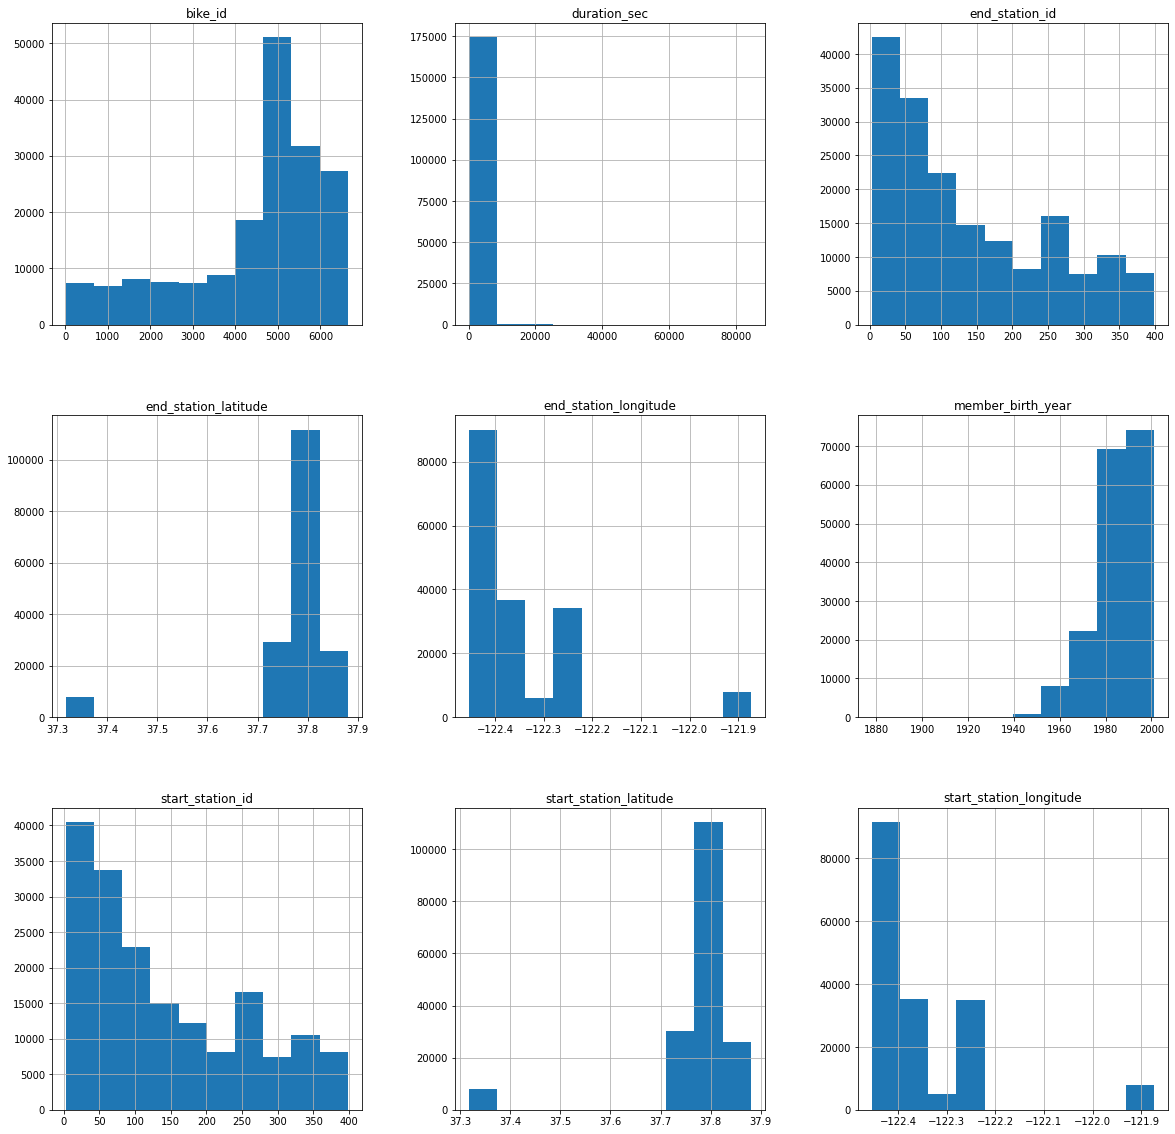

In [37]:
# explore data
GoBike.hist(figsize=(20,20));

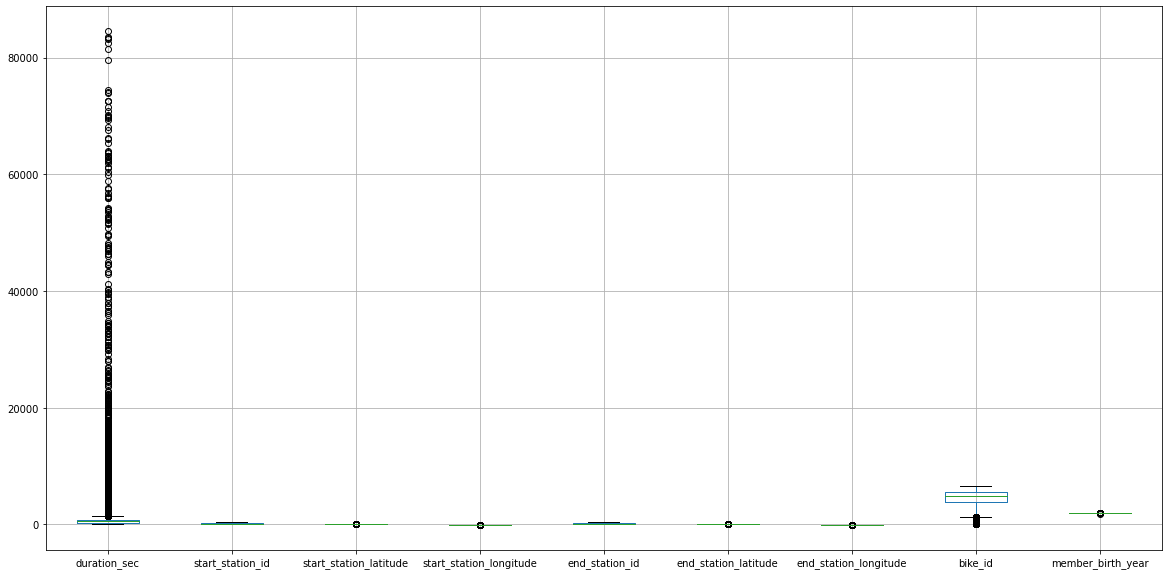

In [38]:
# explore data
GoBike.boxplot(figsize=(20,10));

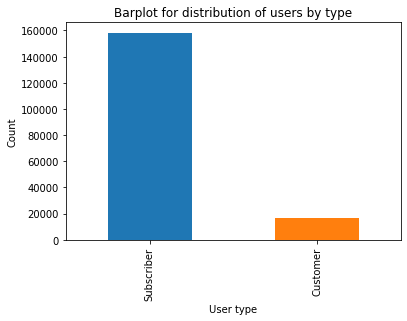

In [57]:
#Plot the distribution of user_type
GoBike['user_type'].value_counts().plot(kind='bar')
plt.title('Barplot for distribution of users by type')
plt.xlabel('User type')
plt.ylabel('Count');

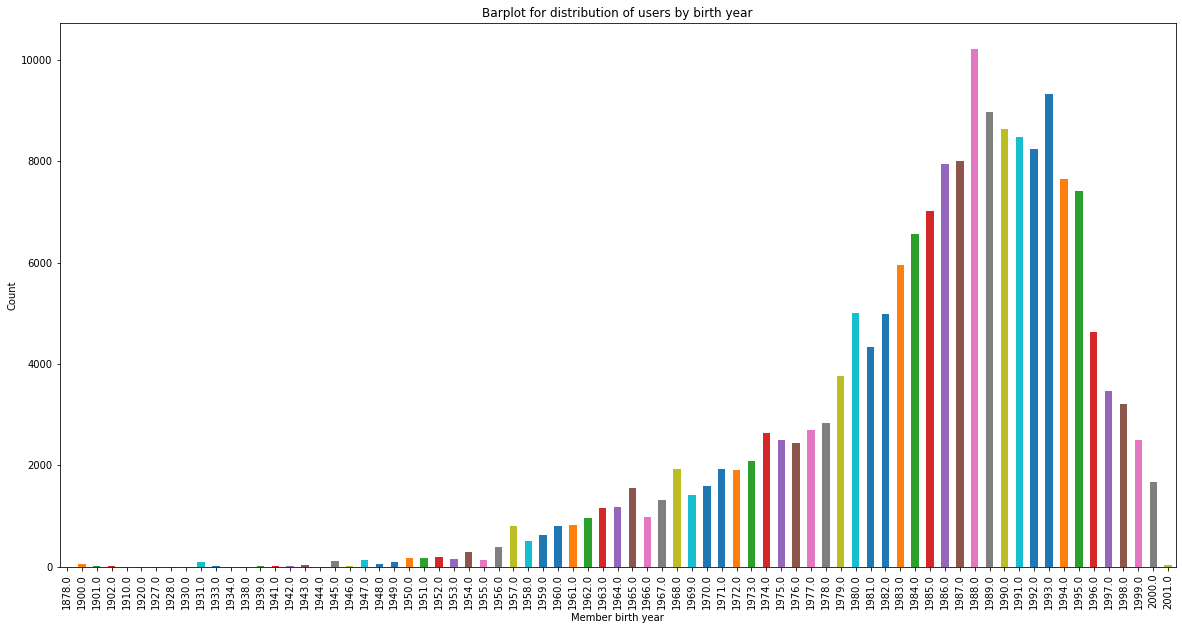

In [59]:
#Plot the distribution of member_birth_year
GoBike.groupby('member_birth_year').size().plot(figsize=(20,10),kind='bar')
plt.title('Barplot for distribution of users by birth year')
plt.xlabel('Member birth year')
plt.ylabel('Count');

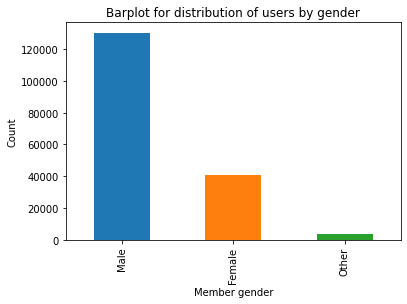

In [58]:
#Plot the distribution of member_gender
GoBike['member_gender'].value_counts().plot(kind='bar')
plt.title('Barplot for distribution of users by gender')
plt.xlabel('Member gender')
plt.ylabel('Count');

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> I have observed that Males are more than females and other genders.<br>
> I have observed that subscriber users are more than customer users.<br>
> I have observed that majority of the users are born between 1978 and 1998.<br>

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> member_birth_year had to be plotted in a larger plot so that it gives a better insight regarding the distribution of birth years for bike users. <br>

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [42]:
numeric_vars = ['duration_sec', 'start_time', 'end_time', 'start_station_id', 'start_station_latitude', 
                'start_station_longitude', 'end_station_id','end_station_latitude', 'end_station_longitude',
               'bike_id', 'member_birth_year']

categoric_vars = ['start_station_name', 'end_station_name', 'user_type', 'member_gender','bike_share_for_all_trip']


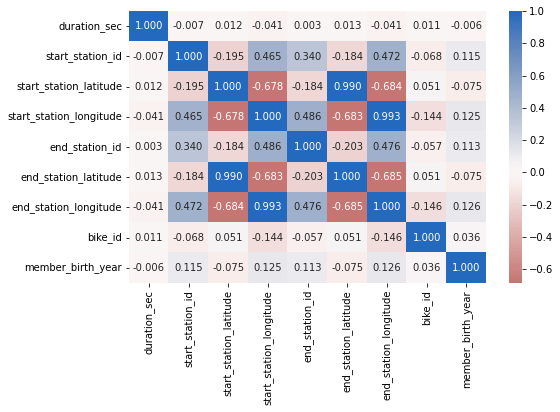

In [43]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(GoBike[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

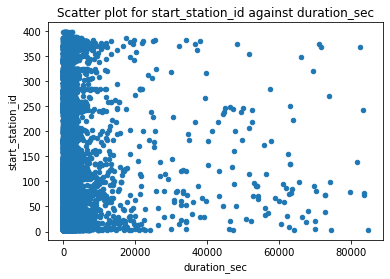

In [44]:
# Scatterplot to determine the relation between start_station_name and duration_sec
def my_func(x,y):
    GoBike.plot(x, y, kind="scatter")
    plt.title("Scatter plot for " + y + " against duration_sec")
    plt.xlabel(x)
    plt.ylabel(y)
my_func('duration_sec','start_station_id')

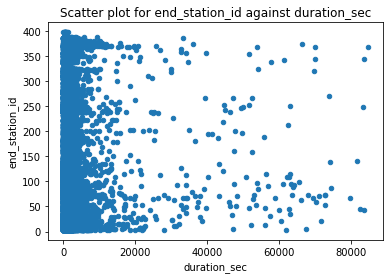

In [45]:
my_func('duration_sec','end_station_id')

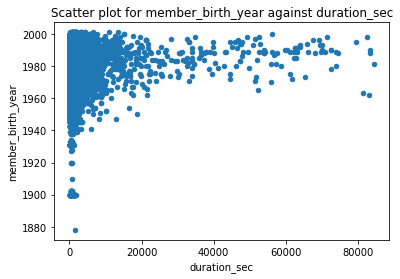

In [46]:
my_func('duration_sec','member_birth_year')

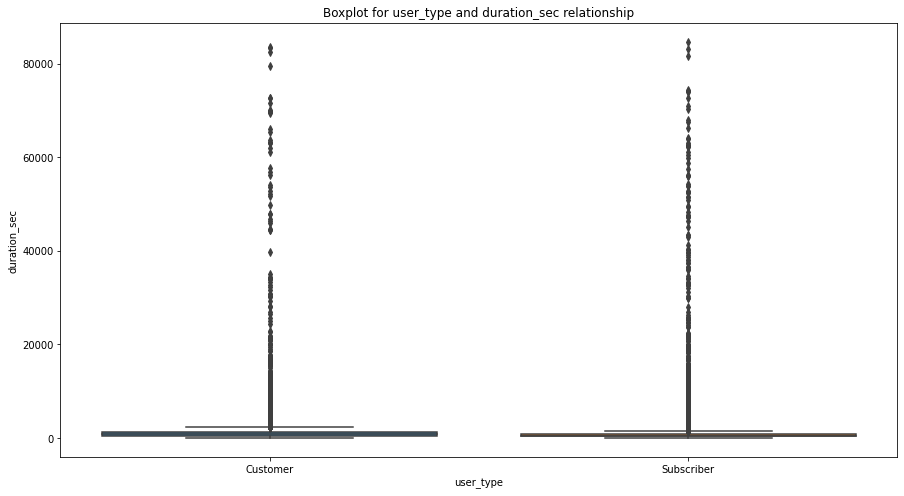

In [60]:
plt.figure(figsize=(15,8))
sb.boxplot(data = GoBike, x = 'user_type',y = 'duration_sec').set_title('Boxplot for user_type and duration_sec relationship');

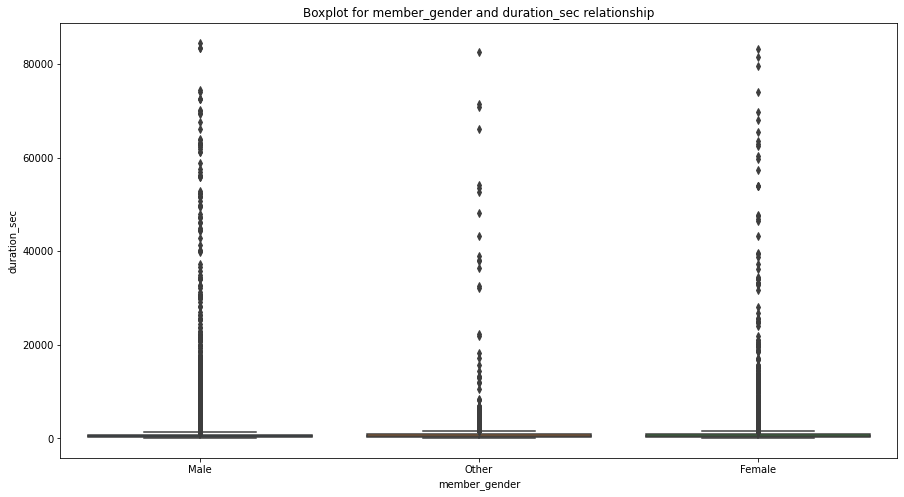

In [61]:
plt.figure(figsize=(15,8))
sb.boxplot(data = GoBike, x = 'member_gender',y = 'duration_sec').set_title('Boxplot for member_gender and duration_sec relationship');

In [49]:
#!pip install seaborn --upgrade

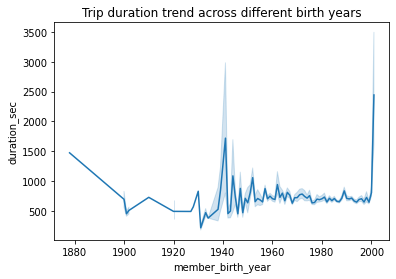

In [56]:
sb.lineplot(
    x="member_birth_year", 
    y="duration_sec",
    data=GoBike).set_title('Trip duration trend across different birth years');

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The starting station has minimal effect on the trip duration.<br>
> The end station has minimal effect on the trip duration.<br>
> The birth year has significant impact on the trip duration as depicted on the visualization the longest trips where taken by members born in 1970 and later.<br>
> Gender has a significant impact on the trip duration has seen from the visualization more males attained higher trip durations than females and other genders.<br>
> There seems to be an even distribution of trip duration among the two user types

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> From the heatmap I observed there is a very high correlation between the start_station_latitude, start_station_longitude, end_station_latitude and end_station_longitude.<br>

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

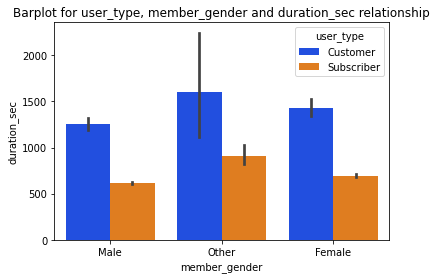

In [62]:
# Barplot to determine the relation between user_type, member_gender  and duration_sec
sb.barplot(
    x='member_gender',
    y='duration_sec', 
    data=GoBike,
    palette='bright',
    hue='user_type').set_title('Barplot for user_type, member_gender and duration_sec relationship');

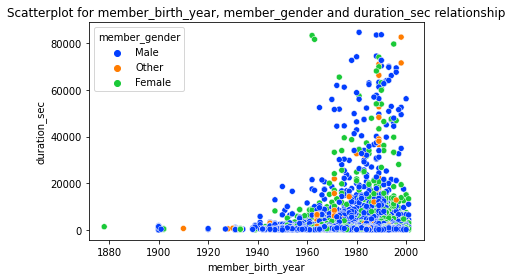

In [63]:
# Scatterplot to determine the relation between member_birth_year, member_gender  and duration_sec
sb.scatterplot(
    x='member_birth_year',
    y='duration_sec', 
    data=GoBike,
    palette='bright',
    hue='member_gender').set_title('Scatterplot for member_birth_year, member_gender and duration_sec relationship');

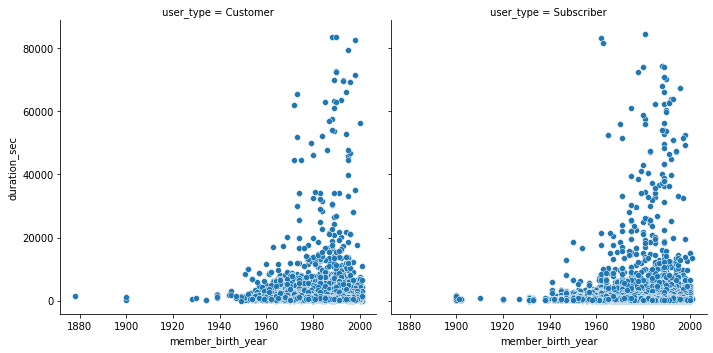

In [65]:
# Relational plot for member_birth_year, user_type and duration_sec relationship
sb.relplot(
    x='member_birth_year', 
    y='duration_sec', 
    data=GoBike, 
    kind='scatter', 
    col='user_type');

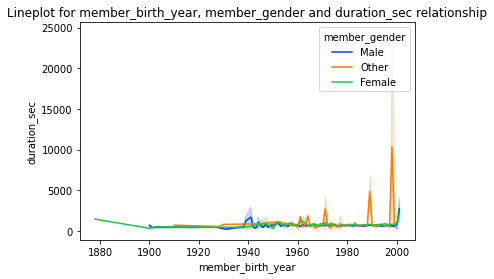

In [67]:
sb.lineplot(
    x="member_birth_year", 
    y="duration_sec",
    data=GoBike,
    palette='bright',
    hue='member_gender').set_title('Lineplot for member_birth_year, member_gender and duration_sec relationship');

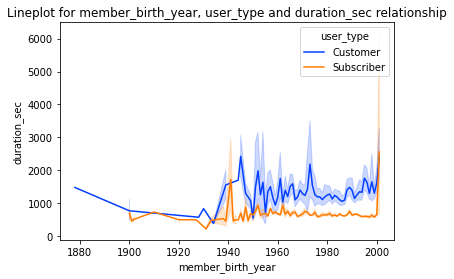

In [68]:
sb.lineplot(
    x="member_birth_year", 
    y="duration_sec",
    data=GoBike,
    palette='bright',
    hue='user_type').set_title('Lineplot for member_birth_year, user_type and duration_sec relationship');

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The customers user type had an higher trip duration than the subscibers user type across all the genders.<br>
> Most users of the service are males born between 1940 to 2000.<br>

### Were there any interesting or surprising interactions between features?

> It was interesting to note that customers had a higher trip duration than subscribers when the opposite is expected considering that subscribers have a relationship with Gobike and the assumption is that they have more experience which should translate to higher trip durations.<br> 

## Conclusions
> Majority of the features directly affect the trip durations as observed in the above visuals hence they should be put into consideration so as to better the service. 
